In [1]:
from sklearn import datasets
iris = datasets.load_iris()
input_data = iris.data
output_data = iris.target

In [13]:
X_sepal_length = input_data[:,0]
X_sepal_width = input_data[:,1]
X_petal_length = input_data[:,2]
X_sepal_width = input_data[:,3]

In [17]:
from sklearn.model_selection import train_test_split
input_data_train, input_data_test, output_data_train, output_data_test = train_test_split(input_data, output_data, test_size = 0.4)

In [19]:
input_data_train.shape, output_data_train.shape, input_data.shape, output_data.shape

((90, 4), (90,), (150, 4), (150,))

In [25]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(1)

In [27]:
clf.fit(input_data_train, output_data_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
clf.predict([[6.3, 2.7, 5.5, 1.5]])

array([2])

In [33]:
clf.score(input_data_train, output_data_train)

1.0

In [35]:
clf.score(input_data_test, output_data_test)

0.95

NameError: name 'input_data_sepal_only' is not defined

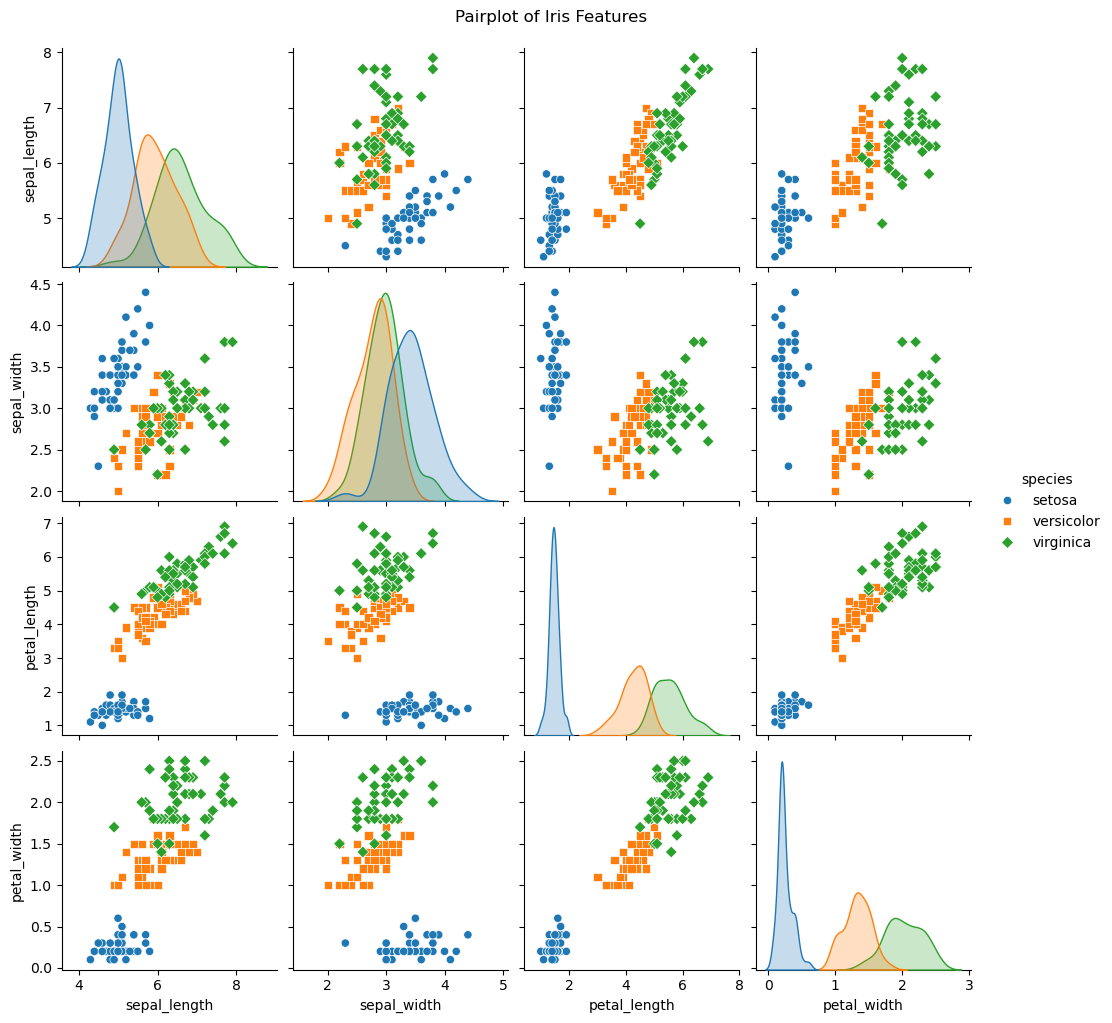

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the iris dataset directly from seaborn
df = sns.load_dataset("iris")

sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


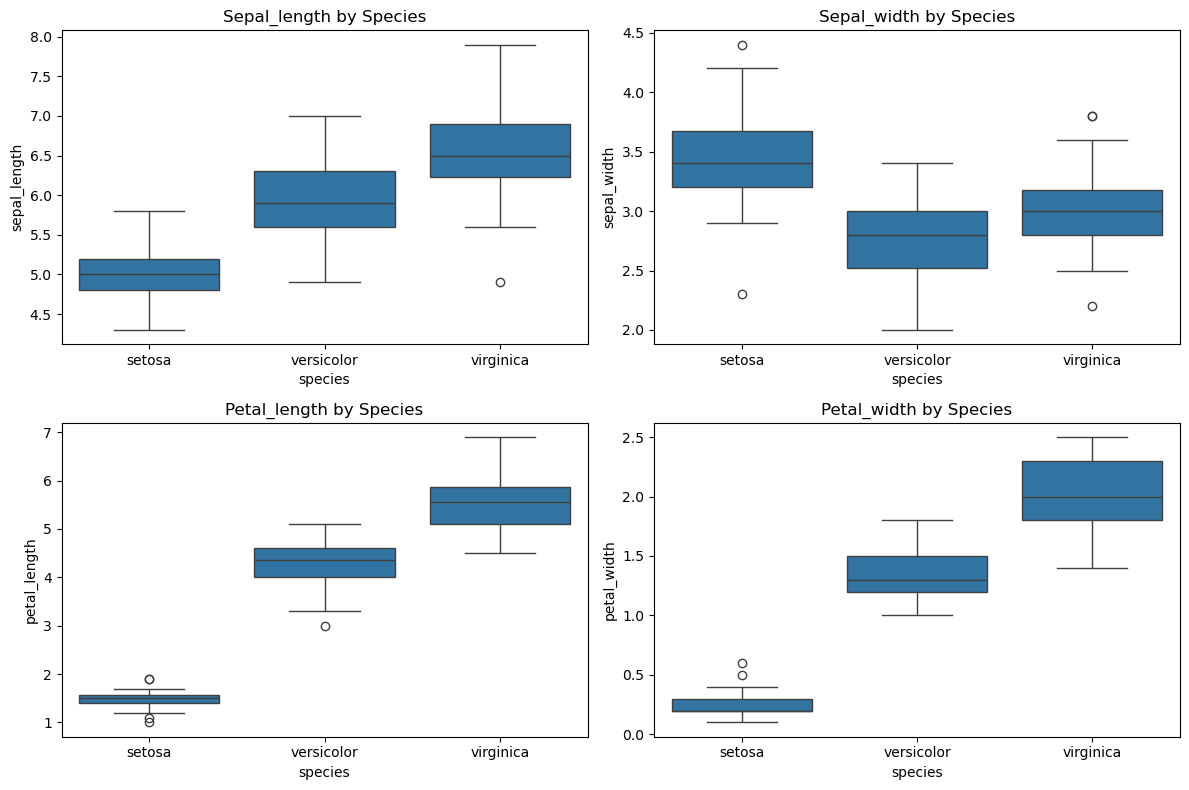

In [49]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature.capitalize()} by Species')
plt.tight_layout()
plt.show()

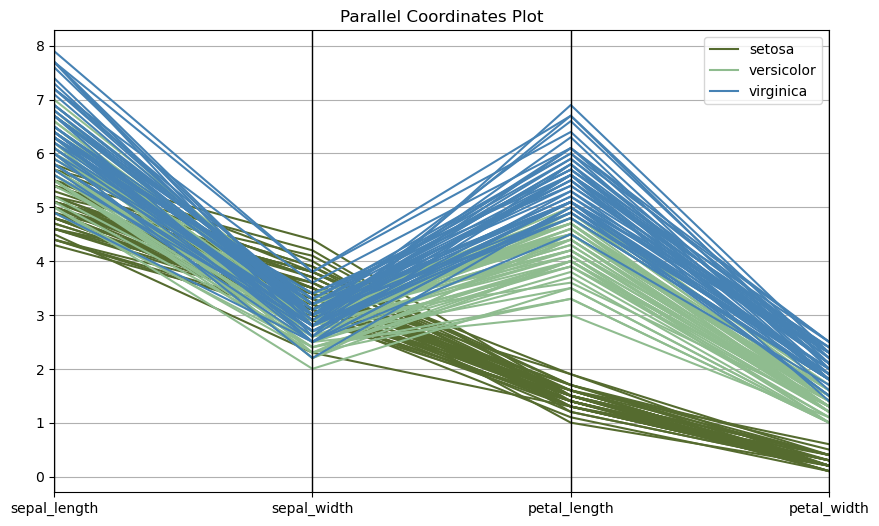

In [51]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10, 6))
parallel_coordinates(df, class_column="species", cols=features, color=["#556b2f", "#8fbc8f", "#4682b4"])
plt.title("Parallel Coordinates Plot")
plt.show()

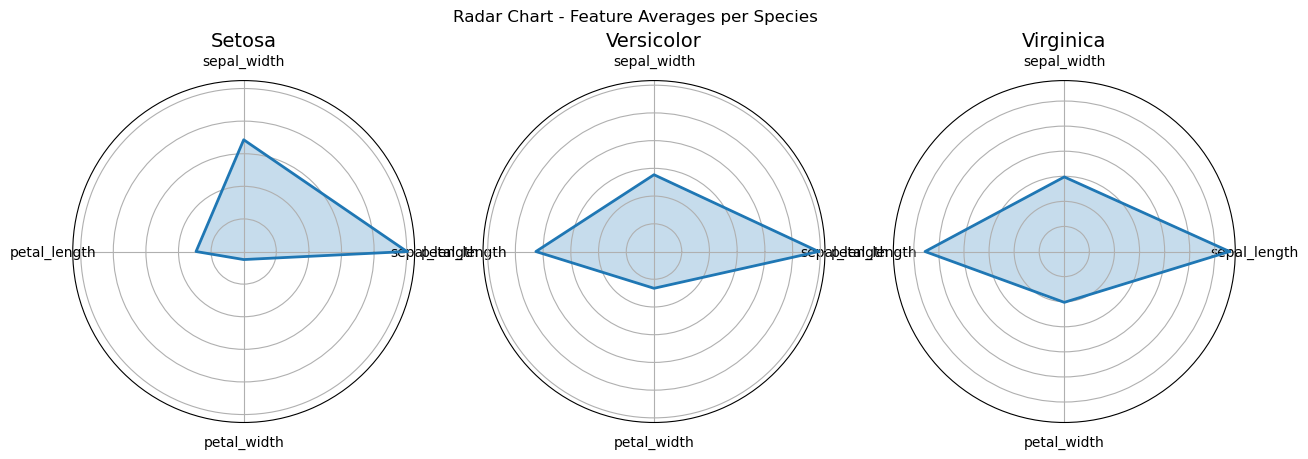

In [53]:
import numpy as np

# Calculate mean per species
mean_df = df.groupby('species')[features].mean()

# Radar chart function
def radar_chart(ax, data, feature_labels, species):
    angles = np.linspace(0, 2 * np.pi, len(feature_labels), endpoint=False).tolist()
    data += data[:1]
    angles += angles[:1]
    
    ax.plot(angles, data, color='tab:blue', linewidth=2, label=species)
    ax.fill(angles, data, color='tab:blue', alpha=0.25)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(feature_labels)

# Plot radar charts for each species
fig, axes = plt.subplots(1, 3, subplot_kw=dict(polar=True), figsize=(15, 5))
for i, (species, row) in enumerate(mean_df.iterrows()):
    radar_chart(axes[i], row.tolist(), features, species)
    axes[i].set_title(species.capitalize(), size=14)
plt.suptitle("Radar Chart - Feature Averages per Species")
plt.show()


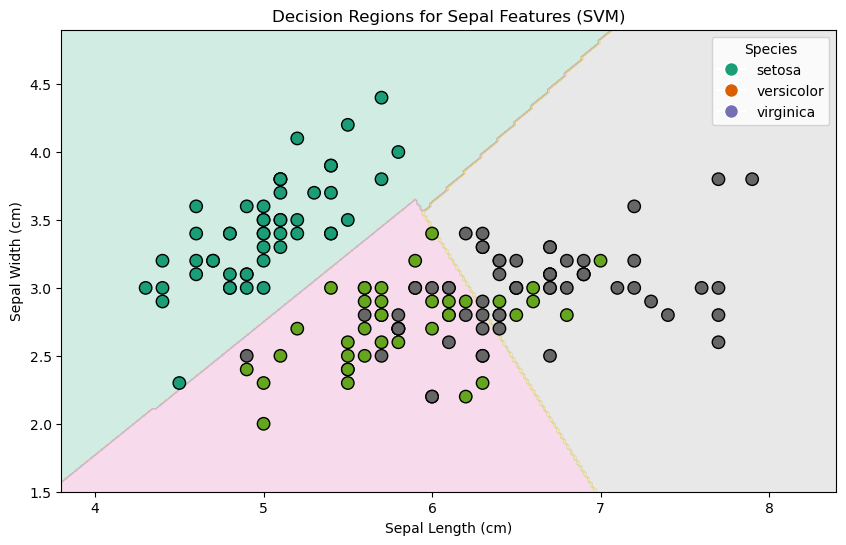

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
df = sns.load_dataset("iris")

# Use only sepal features
input_data = df[['sepal_length', 'sepal_width']].values
output_data = LabelEncoder().fit_transform(df['species'])  # Encode species as integers

# Train SVM classifier
clf = SVC(kernel='linear', random_state=0)
clf.fit(input_data, output_data)

# Plotting decision regions
a_min, a_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
b_min, b_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set2')
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2', edgecolor='k', s=80)

# Legend
legend_labels = df['species'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i), markersize=10) for i in range(3)]
plt.legend(handles, legend_labels, title='Species')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Regions for Sepal Features (SVM)')
plt.show()


In [61]:
import pandas as pd

# Load iris dataset
df = sns.load_dataset("iris")

In [64]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [66]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [70]:
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [72]:
df['sepal_width'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal_width, Length: 150, dtype: bool

In [74]:
df.dropna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [87]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [115]:
iris_versicolor = df[df['species'] == 'setosa']

In [131]:
print(iris_versicolor['sepal_length'].mean())

5.006


In [133]:
df.loc[82]

sepal_length           5.8
sepal_width            2.7
petal_length           3.9
petal_width            1.2
species         versicolor
Name: 82, dtype: object

In [135]:
df.iloc[82]

sepal_length           5.8
sepal_width            2.7
petal_length           3.9
petal_width            1.2
species         versicolor
Name: 82, dtype: object

In [139]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [150]:
df.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [156]:
df.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

species
setosa        [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
versicolor    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
virginica     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
dtype: object

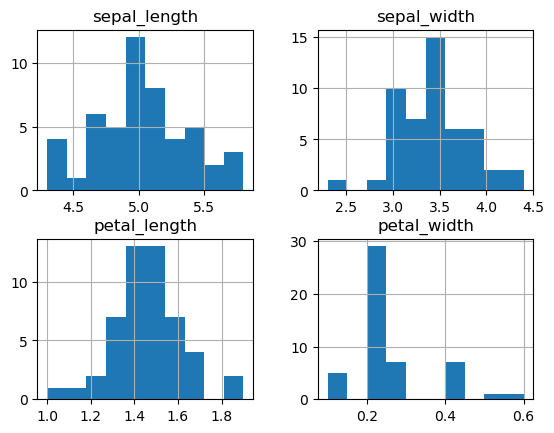

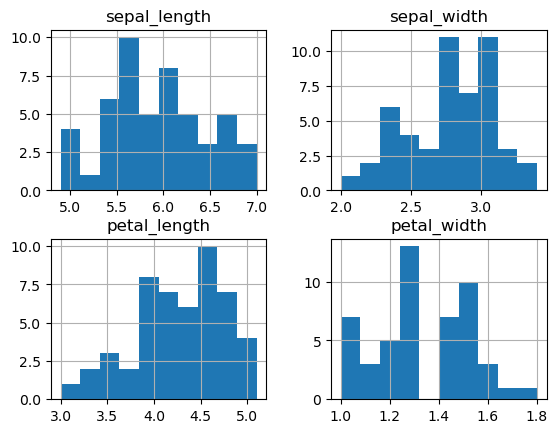

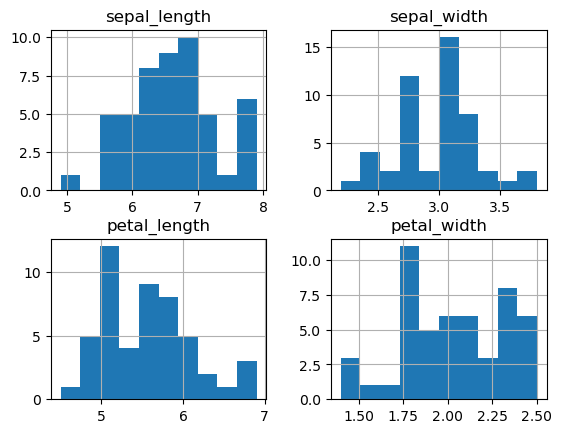

In [158]:
df.groupby('species').hist()

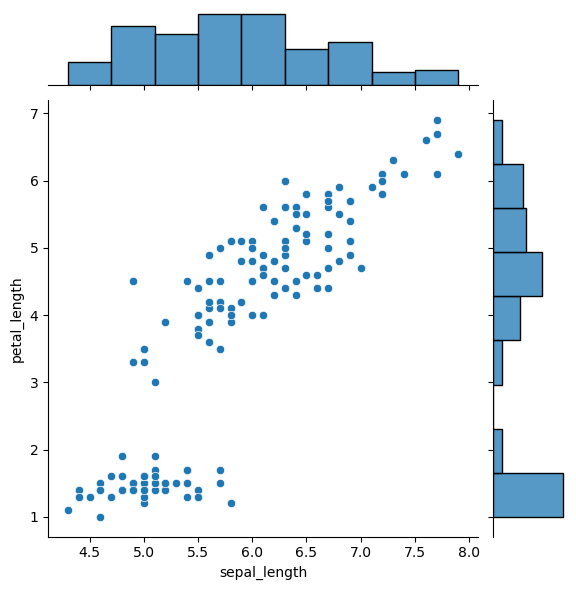

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset("iris")

# Correct usage
sns.jointplot(data=df, x='sepal_length', y='petal_length', kind='scatter')

plt.show()


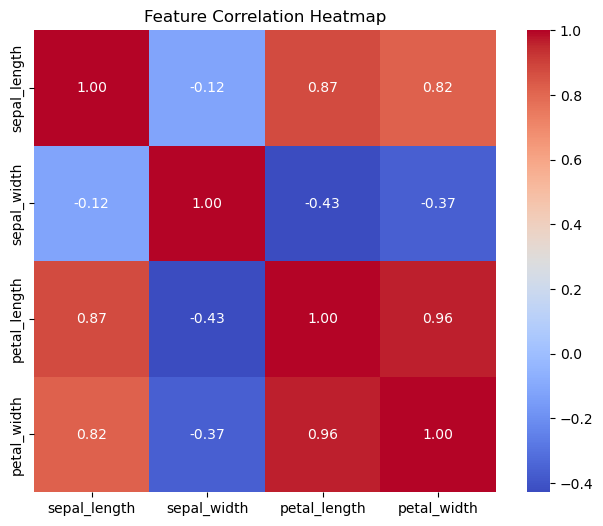

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset("iris")

# Compute correlation matrix using only numerical columns (excluding 'species')
corrmat = df.drop('species', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f', square=True)

plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
from sklearn.datasets import load_digits

data = load_digits()
input_data, output_data = data.data, data.target

input_data.shape
output_data.shape

(1797,)

In [17]:
import sklearn.linear_model as lm
lr = lm.LinearRegression()
lr.fit(input_data, output_data)
lr.score(input_data, output_data)

0.5983606046616206

Actual vs Predicted values:
Actual: 219.00, Predicted: 139.55
Actual: 70.00, Predicted: 179.52
Actual: 202.00, Predicted: 134.04
Actual: 230.00, Predicted: 291.42
Actual: 111.00, Predicted: 123.79
Actual: 84.00, Predicted: 92.17
Actual: 242.00, Predicted: 258.23
Actual: 272.00, Predicted: 181.34
Actual: 94.00, Predicted: 90.22
Actual: 96.00, Predicted: 108.63
Actual: 94.00, Predicted: 94.14
Actual: 252.00, Predicted: 168.43
Actual: 99.00, Predicted: 53.50
Actual: 297.00, Predicted: 206.63
Actual: 135.00, Predicted: 100.13
Actual: 67.00, Predicted: 130.67
Actual: 295.00, Predicted: 219.53
Actual: 264.00, Predicted: 250.78
Actual: 170.00, Predicted: 196.37
Actual: 275.00, Predicted: 218.58
Actual: 310.00, Predicted: 207.35
Actual: 64.00, Predicted: 88.48
Actual: 128.00, Predicted: 70.43
Actual: 232.00, Predicted: 188.96
Actual: 129.00, Predicted: 154.89
Actual: 118.00, Predicted: 159.36
Actual: 263.00, Predicted: 188.31
Actual: 77.00, Predicted: 180.39
Actual: 48.00, Predicted: 47.99
Act

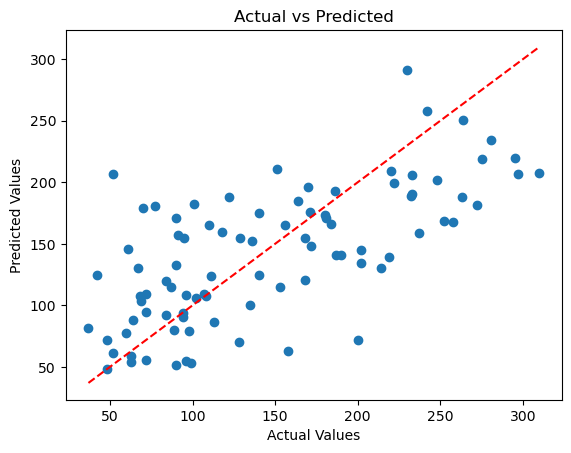

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Print actual vs predicted values
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Optional: Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

Actual vs Predicted values:
Actual: 219.00, Predicted: 139.55
Actual: 70.00, Predicted: 179.52
Actual: 202.00, Predicted: 134.04
Actual: 230.00, Predicted: 291.42
Actual: 111.00, Predicted: 123.79
Actual: 84.00, Predicted: 92.17
Actual: 242.00, Predicted: 258.23
Actual: 272.00, Predicted: 181.34
Actual: 94.00, Predicted: 90.22
Actual: 96.00, Predicted: 108.63
Actual: 94.00, Predicted: 94.14
Actual: 252.00, Predicted: 168.43
Actual: 99.00, Predicted: 53.50
Actual: 297.00, Predicted: 206.63
Actual: 135.00, Predicted: 100.13
Actual: 67.00, Predicted: 130.67
Actual: 295.00, Predicted: 219.53
Actual: 264.00, Predicted: 250.78
Actual: 170.00, Predicted: 196.37
Actual: 275.00, Predicted: 218.58
Actual: 310.00, Predicted: 207.35
Actual: 64.00, Predicted: 88.48
Actual: 128.00, Predicted: 70.43
Actual: 232.00, Predicted: 188.96
Actual: 129.00, Predicted: 154.89
Actual: 118.00, Predicted: 159.36
Actual: 263.00, Predicted: 188.31
Actual: 77.00, Predicted: 180.39
Actual: 48.00, Predicted: 47.99
Act

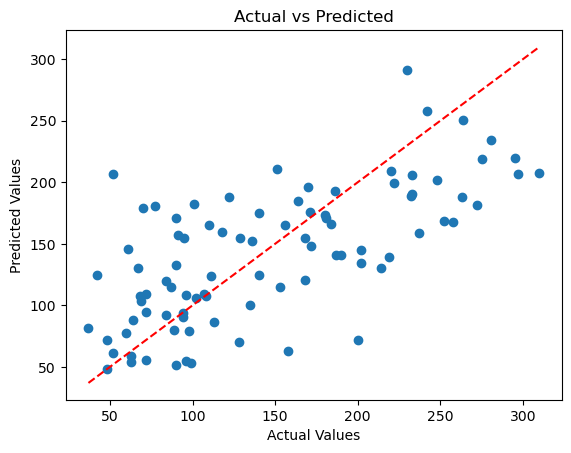

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Print actual vs predicted values
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Optional: Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

Actual vs Predicted values:
Actual: 219.00, Predicted: 139.55
Actual: 70.00, Predicted: 179.52
Actual: 202.00, Predicted: 134.04
Actual: 230.00, Predicted: 291.42
Actual: 111.00, Predicted: 123.79
Actual: 84.00, Predicted: 92.17
Actual: 242.00, Predicted: 258.23
Actual: 272.00, Predicted: 181.34
Actual: 94.00, Predicted: 90.22
Actual: 96.00, Predicted: 108.63
Actual: 94.00, Predicted: 94.14
Actual: 252.00, Predicted: 168.43
Actual: 99.00, Predicted: 53.50
Actual: 297.00, Predicted: 206.63
Actual: 135.00, Predicted: 100.13
Actual: 67.00, Predicted: 130.67
Actual: 295.00, Predicted: 219.53
Actual: 264.00, Predicted: 250.78
Actual: 170.00, Predicted: 196.37
Actual: 275.00, Predicted: 218.58
Actual: 310.00, Predicted: 207.35
Actual: 64.00, Predicted: 88.48
Actual: 128.00, Predicted: 70.43
Actual: 232.00, Predicted: 188.96
Actual: 129.00, Predicted: 154.89
Actual: 118.00, Predicted: 159.36
Actual: 263.00, Predicted: 188.31
Actual: 77.00, Predicted: 180.39
Actual: 48.00, Predicted: 47.99
Act

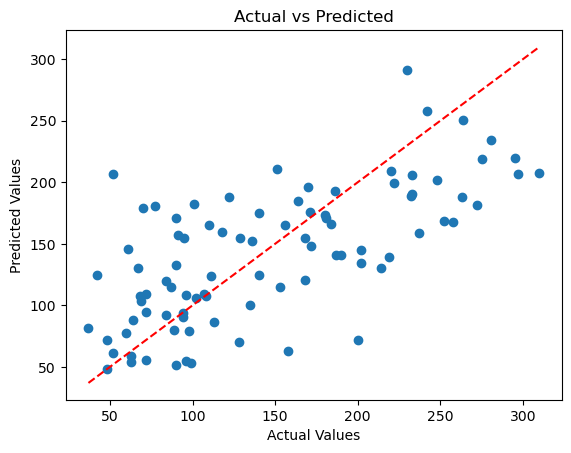

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Print actual vs predicted values
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Optional: Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [270]:
import sklearn.linear_model as lm
logr = lm.LogisticRegression()

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

input_data = diabetes.data
output_data = diabetes.target

input_data.shape
output_data.shape

(442,)

In [260]:
logr.fit(input_data, output_data)

C:\Users\alexe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [258]:
logr.score(input_data, output_data)

0.9733333333333334

In [276]:
from sklearn.svm import SVC

data = load_diabetes()

input_data = diabetes.data
output_data = diabetes.target

model1 = SVC(kernel='linear', C=1)
model1.fit(input_data, output_data)
model1.score(input_data, output_data)

0.020361990950226245

In [3]:

model = SVM(kernel='rbf', C = 1E6, gamma = 1.0)
model.fit(X,y)
print(model.score(X,y))


NameError: name 'SVM' is not defined

Actual vs Predicted values:
Actual: 219.00, Predicted: 200.00
Actual: 70.00, Predicted: 178.00
Actual: 202.00, Predicted: 178.00
Actual: 230.00, Predicted: 178.00
Actual: 111.00, Predicted: 178.00
Actual: 84.00, Predicted: 200.00
Actual: 242.00, Predicted: 178.00
Actual: 272.00, Predicted: 178.00
Actual: 94.00, Predicted: 71.00
Actual: 96.00, Predicted: 200.00
Actual: 94.00, Predicted: 200.00
Actual: 252.00, Predicted: 178.00
Actual: 99.00, Predicted: 71.00
Actual: 297.00, Predicted: 178.00
Actual: 135.00, Predicted: 71.00
Actual: 67.00, Predicted: 71.00
Actual: 295.00, Predicted: 178.00
Actual: 264.00, Predicted: 178.00
Actual: 170.00, Predicted: 178.00
Actual: 275.00, Predicted: 178.00
Actual: 310.00, Predicted: 200.00
Actual: 64.00, Predicted: 200.00
Actual: 128.00, Predicted: 200.00
Actual: 232.00, Predicted: 178.00
Actual: 129.00, Predicted: 200.00
Actual: 118.00, Predicted: 178.00
Actual: 263.00, Predicted: 178.00
Actual: 77.00, Predicted: 178.00
Actual: 48.00, Predicted: 71.00
A

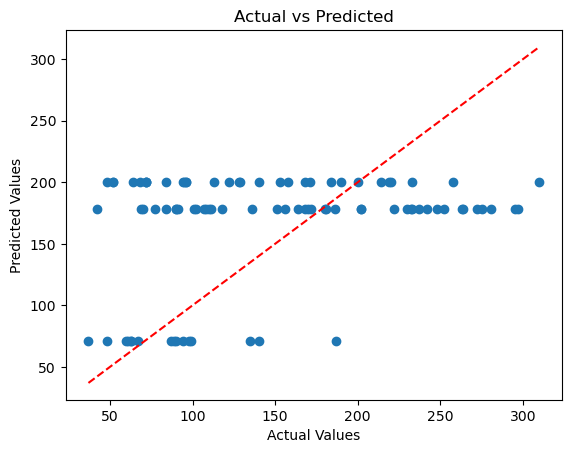

In [302]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Print actual vs predicted values
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Optional: Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



model = SVC(kernel='rbf', C=1E6, gamma=1.0)
model.fit(X, y)
print(model.score(X,y))

NameError: name 'SVC' is not defined

Actual vs Predicted values:
Actual: 219.00, Predicted: 200.00
Actual: 70.00, Predicted: 178.00
Actual: 202.00, Predicted: 178.00
Actual: 230.00, Predicted: 178.00
Actual: 111.00, Predicted: 178.00
Actual: 84.00, Predicted: 200.00
Actual: 242.00, Predicted: 178.00
Actual: 272.00, Predicted: 178.00
Actual: 94.00, Predicted: 71.00
Actual: 96.00, Predicted: 200.00
Actual: 94.00, Predicted: 200.00
Actual: 252.00, Predicted: 178.00
Actual: 99.00, Predicted: 71.00
Actual: 297.00, Predicted: 178.00
Actual: 135.00, Predicted: 71.00
Actual: 67.00, Predicted: 71.00
Actual: 295.00, Predicted: 178.00
Actual: 264.00, Predicted: 178.00
Actual: 170.00, Predicted: 178.00
Actual: 275.00, Predicted: 178.00
Actual: 310.00, Predicted: 200.00
Actual: 64.00, Predicted: 200.00
Actual: 128.00, Predicted: 200.00
Actual: 232.00, Predicted: 178.00
Actual: 129.00, Predicted: 200.00
Actual: 118.00, Predicted: 178.00
Actual: 263.00, Predicted: 178.00
Actual: 77.00, Predicted: 178.00
Actual: 48.00, Predicted: 71.00
A

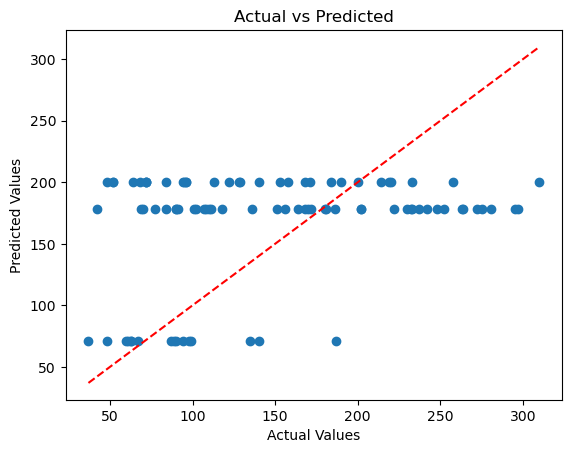

In [302]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Print actual vs predicted values
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Optional: Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Print actual vs predicted values
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Optional: Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

NameError: name 'SVC' is not defined

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Print actual vs predicted values
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Optional: Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

NameError: name 'SVC' is not defined

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Print actual vs predicted values
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Optional: Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

NameError: name 'SVC' is not defined

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Print actual vs predicted values
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Optional: Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

NameError: name 'SVC' is not defined

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X,y)
print(tree.score(X,y))

1.0


In [33]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib

tree = DecisionTreeClassifier(max_depth = 1)
tree.fit(X,y)
print(tree.score(X,y))

tree2 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1, max_leaf_nodes = 8)
tree2.fit(X,y)
print(tree2.score(X,y))

tree3 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1, min_samples_split = 4, max_leaf_nodes = 8)
tree3.fit(X,y)
print(tree3.score(X,y))



0.02262443438914027
0.04751131221719457
0.04751131221719457


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion = 'gini', max_depth = None, max_features = 'auto', max_leaf_nodes = None, min_samples_leaf = 1, min_samples_split = 2, min_weight_fraction_leaf = 0.0, n_estimators = 10, n_jobs = 1, oob_score=False, random_state = None, verbose = 0, warm_start= False)

rf.fit(X, y)
print(rf.score(X,y))


1.0


In [53]:
# Boosted Decision Trees

from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier()
bdt.fit(X,y)
print(bdt.score(X,y))



0.024886877828054297


C:\Users\alexe\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


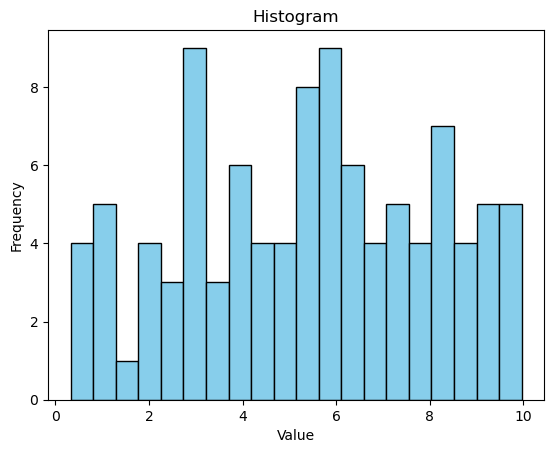

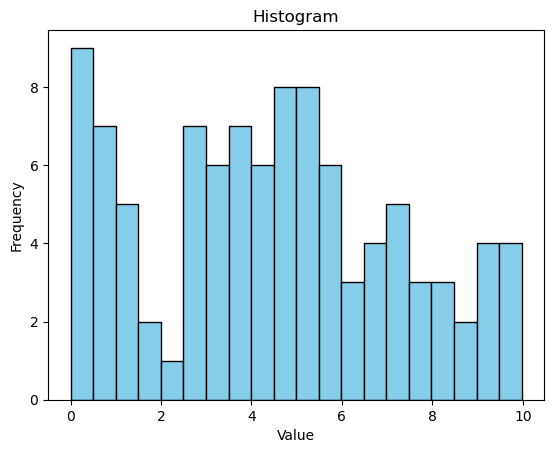

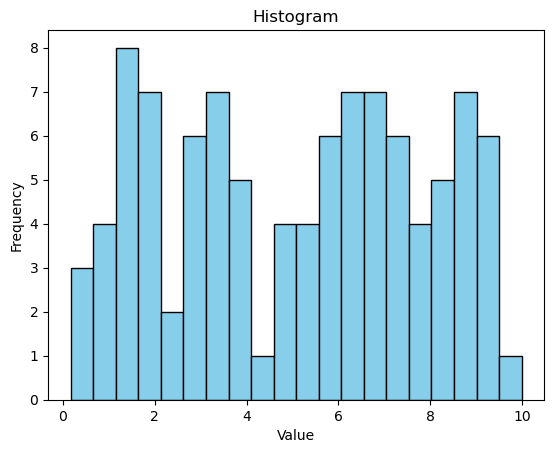

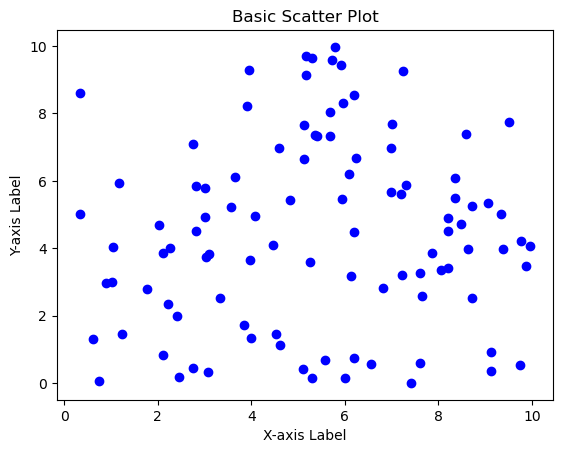

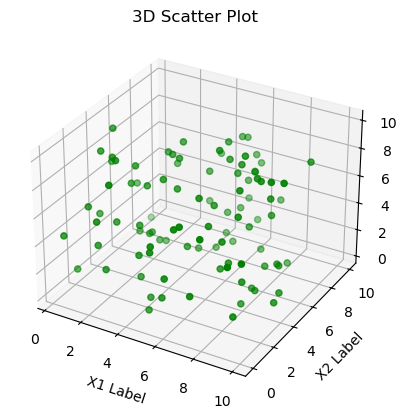

In [69]:
import numpy as np
import matplotlib.pyplot as plt

n = 100; vmin = 0; vmax = 10
x1 = np.random.uniform(vmin, vmax, n)
x2 = np.random.uniform(vmin, vmax, n)
x3 = np.random.uniform(vmin, vmax, n)

# Plot histogram
plt.hist(x1, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.hist(x2, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.hist(x3, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Scatter plot
plt.scatter(x1, x2, color='blue', marker='o')

# Labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Basic Scatter Plot')

# Show plot
plt.show()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x1, x2, x3, c='green', marker='o')

# Labels
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('X3 Label')
ax.set_title('3D Scatter Plot')

plt.show()


In [3]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.svm import SVC

svc = SVC(kernel='linear')
iris = load_iris()

for fid in range(len(iris.feature_names)):
    
    X = iris.data[:,fid,np.newaxis]
    y = iris.target

    y[y==2] = 1
    clf = svc.fit(X,y)
    print(iris.feature_names[fid], 'univariate score: '), clf.score(X,y)


sepal length (cm) univariate score: 
sepal width (cm) univariate score: 
petal length (cm) univariate score: 
petal width (cm) univariate score: 


In [39]:
# Decision and selection based on Korrelations and Accuracy

import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the iris dataset from sklearn
iris = datasets.load_iris()

y = iris.target
X = iris.data

# Create DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(df.describe()) # Statistical Measures
print(df.corr()) # Normalized Correlations
print(df.corr('pearson')) # Pearson Correlations
print(df.corr('spearman')) # Spearman Correlations
print(df.cov()) # Covariance Matrix

y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(y_train, X_train)

X_pred = model.predict(y_test)


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)          

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Intercept: -6.9271277314757
Coefficient: 1.8339625990203474
Mean Squared Error: 0.60
R² Score: 0.82


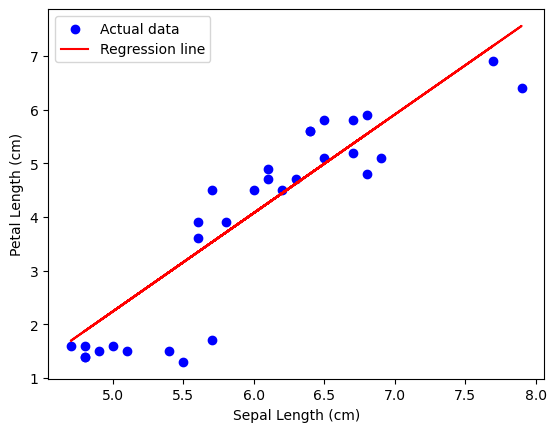

In [57]:

# Calculating Scores for Linear Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Quick look at the data
print(df.head())

# Feature and target
X = df[['sepal length (cm)']]  # Independent variable
y = df['petal length (cm)']    # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

# Performance metrics
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R² Score: {r2_score(y_test, y_pred):.2f}')

plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()


In [59]:
# Calculating accuracy score for classification

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # 0 = setosa, 1 = versicolor, 2 = virginica

# Features and target
X = df[iris.feature_names]
y = df['species']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Load iris dataset
diabetes = datasets.load_diabetes()

# Create DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['species'] = diabetes.target  # 0 = setosa, 1 = versicolor, 2 = virginica

# Features and target
X = df[diabetes.feature_names]
y = df['species']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
model = SVM()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

NameError: name 'SVM' is not defined

In [73]:
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load diabetes dataset
diabetes = datasets.load_diabetes()

# Create DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['species'] = diabetes.target  # target: 0, 1, 2 (setosa, versicolor, virginica)

# Features and target
X = df[diabetes.feature_names]
y = df['species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM model (classifier)
svm_model = SVC(kernel='linear')  # You can also try 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

# Compare accuracy score to standard score (the same for classification models)
print(svm_model.score(X_test, y_test))

Accuracy Score: 0.01
0.011235955056179775


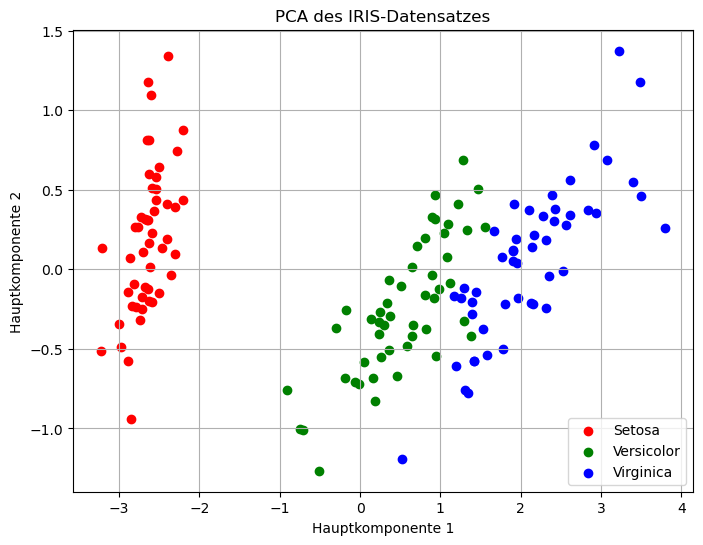

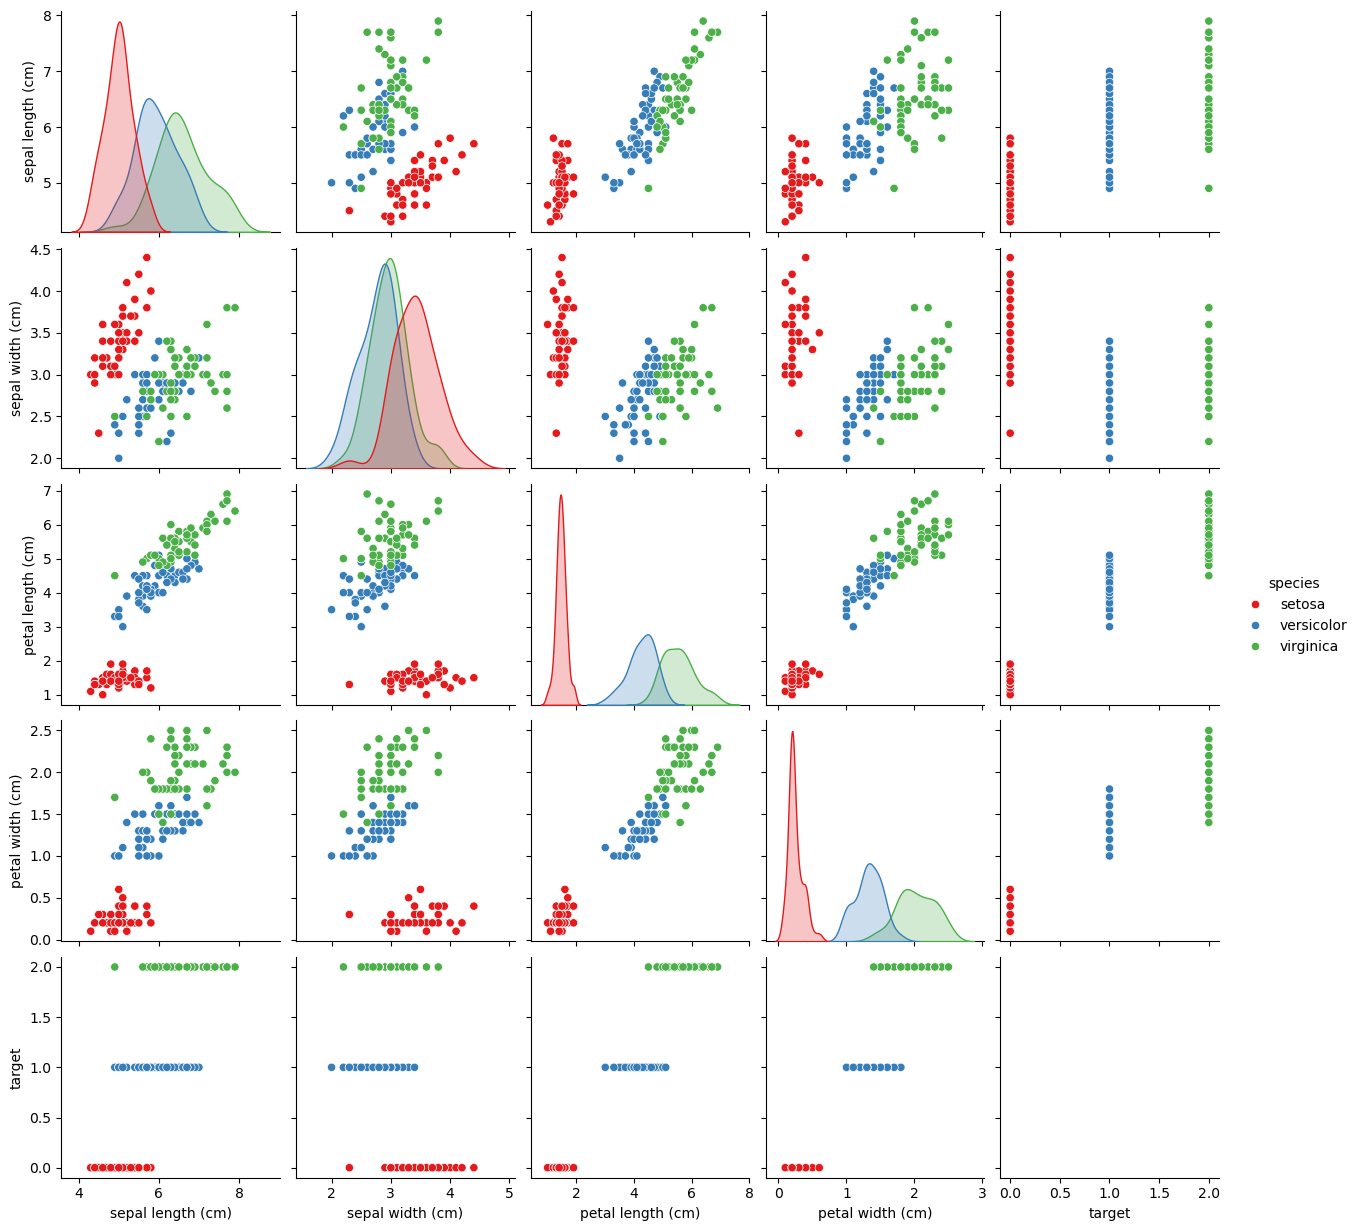

Erklärte Varianz: [0.92461872 0.05306648]
Kumulative erklärte Varianz: [0.92461872 0.97768521]


In [19]:
# PCA of IRIS Dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# IRIS-Datensatz laden
iris = datasets.load_iris()
X = iris.data  # 4 numerische Merkmale
y = iris.target  # Zielklasse (0, 1, 2)

# PCA auf 2 Dimensionen reduzieren
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Ergebnisse in DataFrame für einfachere Handhabung
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Farben und Klassenbezeichnungen
colors = ['red', 'green', 'blue']
labels = ['Setosa', 'Versicolor', 'Virginica']

# Plot
plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    subset = df_pca[df_pca['target'] == i]
    plt.scatter(subset['PC1'], subset['PC2'], color=colors[i], label=label)

plt.title('PCA des IRIS-Datensatzes')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.legend()
plt.grid(True)
plt.show()

# Compare graphically to standard variance

iris = datasets.load_iris()
X = iris.data
y = iris.target

# In DataFrame umwandeln für einfache Visualisierung
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Mapping von Zahlen auf Klassennamen
target_names = dict(enumerate(iris.target_names))
df['species'] = df['target'].map(target_names)

# Scatterplot Matrix (Paarplots)
sns.pairplot(df, hue='species', diag_kind='kde', palette='Set1')
plt.show()

# Optionale Information: Varianz-Anteil pro Komponente
explained_variance = pca.explained_variance_ratio_
print(f'Erklärte Varianz: {explained_variance}')
print(f'Kumulative erklärte Varianz: {np.cumsum(explained_variance)}')


In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Iris-Datensatz laden
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Trainings- und Testsplit (optional, hier nutzen wir alle Daten)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modell 1: Einfacher Baum mit max_depth=1
tree1 = DecisionTreeClassifier(max_depth=1)
tree1.fit(X_train, y_train)

# Vorhersagen und Genauigkeit
y_pred1 = tree1.predict(X_test)
print("\nTree 1 - Depth 1")
print("Score (Train):", tree1.score(X_train, y_train))
print("Score (Test):", tree1.score(X_test, y_test))
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

# Modell 2: Tieferer Baum mit Einschränkungen
tree2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, max_leaf_nodes=8)
tree2.fit(X_train, y_train)

y_pred2 = tree2.predict(X_test)
print("\nTree 2 - Depth 5, max_leaf_nodes=8")
print("Score (Train):", tree2.score(X_train, y_train))
print("Score (Test):", tree2.score(X_test, y_test))
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

# Modell 3: Noch mehr Constraints
tree3 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=4, max_leaf_nodes=8)
tree3.fit(X_train, y_train)

y_pred3 = tree3.predict(X_test)
print("\nTree 3 - Depth 5, max_leaf_nodes=8, min_samples_split=4")
print("Score (Train):", tree3.score(X_train, y_train))
print("Score (Test):", tree3.score(X_test, y_test))
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))


Tree 1 - Depth 1
Score (Train): 0.6476190476190476
Score (Test): 0.7111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      1.00      0.67        13
           2       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45

[[19  0  0]
 [ 0 13  0]
 [ 0 13  0]]

Tree 2 - Depth 5, max_leaf_nodes=8
Score (Train): 0.9904761904761905
Score (Test): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0

C:\Users\alexe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alexe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alexe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
